In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
x = np.linspace(0, 4, num = 100)
dx = x[1] - x[0]
c = 2
dt = 0.1

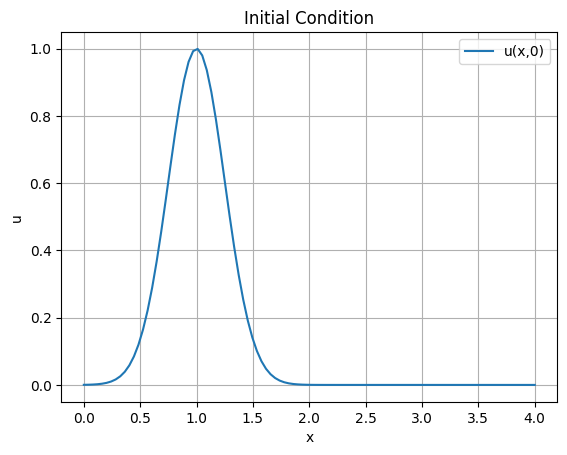

In [80]:
# Part A

u0 = np.exp(-8 * (x - 1)**2) # numpy array containing u(x, 0)

plt.plot(x, u0, label = 'u(x,0)') # plotting u0
plt.xlabel('x')
plt.ylabel('u')
plt.title('Initial Condition')
plt.legend()
plt.grid(True)

In [81]:
# Part B
# Since each equation (F sub i) only contains u(x sub i, delta t) and/or u(x sub (i-1), delta t) and/or u(x sub (i+1), delta t), 
# any cell of the Jacobian that is not on the main diagonal or directly left or right of a diagonal cell is going to remain 0. 
# This means we only have to worry about filling in those said cells. F sub 0 and F sub 99 are special cases since their equations are slightly different as they involve
# u(x sub i, delta t) twice and delta x in the denominator instead of 2 delta x. so J[0, 0] = 1 - dt * c / dx, J[0, 1] = -dt * c / dx, J[99, 98] = -dt * c / dx, and J[99, 99] = 1 + dt * c / dx.
# For every other row/equation, from the equations, the main diagonal component will be 1, the component one cell to the left will be J[i, i-1] = -dt * c / (2 * dx), and the component one cell to the right will be 
# J[i, i+1] = dt * c / (2 * dx).

In [82]:
J = np.zeros((100, 100))

# filling in J so it equals the Jacobian
J[0, 0] = 1 - dt * c / dx
J[0, 1] = -dt * c / dx
for i in range(1, 99):
    J[i, i - 1] = -dt * c / (2 * dx)
    J[i, i] = 1
    J[i, i + 1] = dt * c / (2 * dx)
J[99, 98] = -dt * c / dx
J[99, 99] = 1 + dt * c / dx

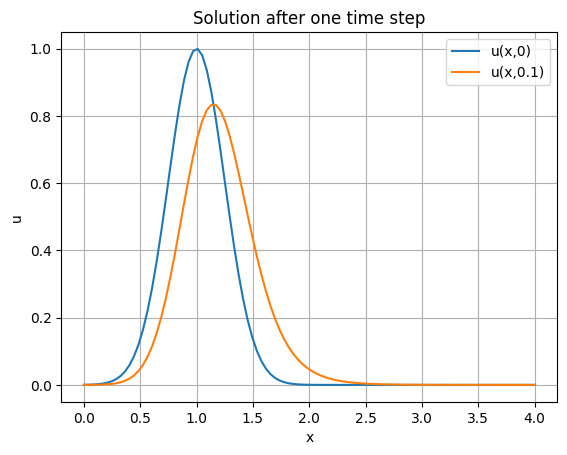

In [83]:
# Part C
u_dt = np.linalg.solve(J, u0) # solving for one time step, using linalg.solve since we know its linear, from the assignment doc

plt.plot(x, u0, label = 'u(x,0)') 
plt.plot(x, u_dt, label = f'u(x,{dt})') # plot the first time step
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution after one time step')
plt.legend()
plt.grid(True)

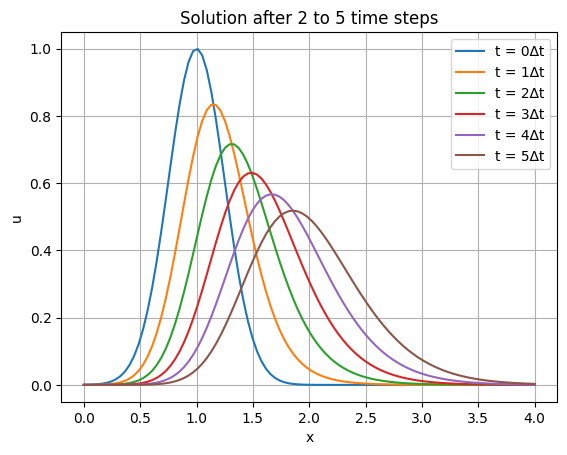

In [84]:
# Part D
u_solutions = [u0.copy()] # array for solutions
u_current = u0.copy()

for i in range(0, 5): # loop through to solve the five time steps
    u_current = np.linalg.solve(J, u_current)
    u_solutions.append(u_current.copy())


for i, u_sol in enumerate(u_solutions): # loop through to plot the five time steps
    plt.plot(x, u_sol, label = f't = {i}∆t')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution after 2 to 5 time steps')
plt.legend()
plt.grid(True)
